importing all the required linraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as sklearn
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("HousePrices.csv")
df.shape

(2073, 81)

code to see what is the format of data

In [ ]:
df.head(15)

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Loop through and print unique values for each
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: Zone_Class
['RL' 'RM' 'C (all)' 'FV' 'RH']

Column: Road_Type
['Pave' 'Grvl']

Column: Alley
[nan 'Grvl' 'Pave']

Column: Property_Shape
['Reg' 'IR1' 'IR2' 'IR3']

Column: LandContour
['Lvl' 'Bnk' 'Low' 'HLS']

Column: Utilities
['AllPub' 'NoSeWa']

Column: LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

Column: LandSlope
['Gtl' 'Mod' 'Sev']

Column: Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

Column: Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

Column: Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']

Column: Dwelling_Type
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

Column: HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

Column: RoofStyle
['Gable' 'Hip' 'Gambrel' 'M

<Axes: >

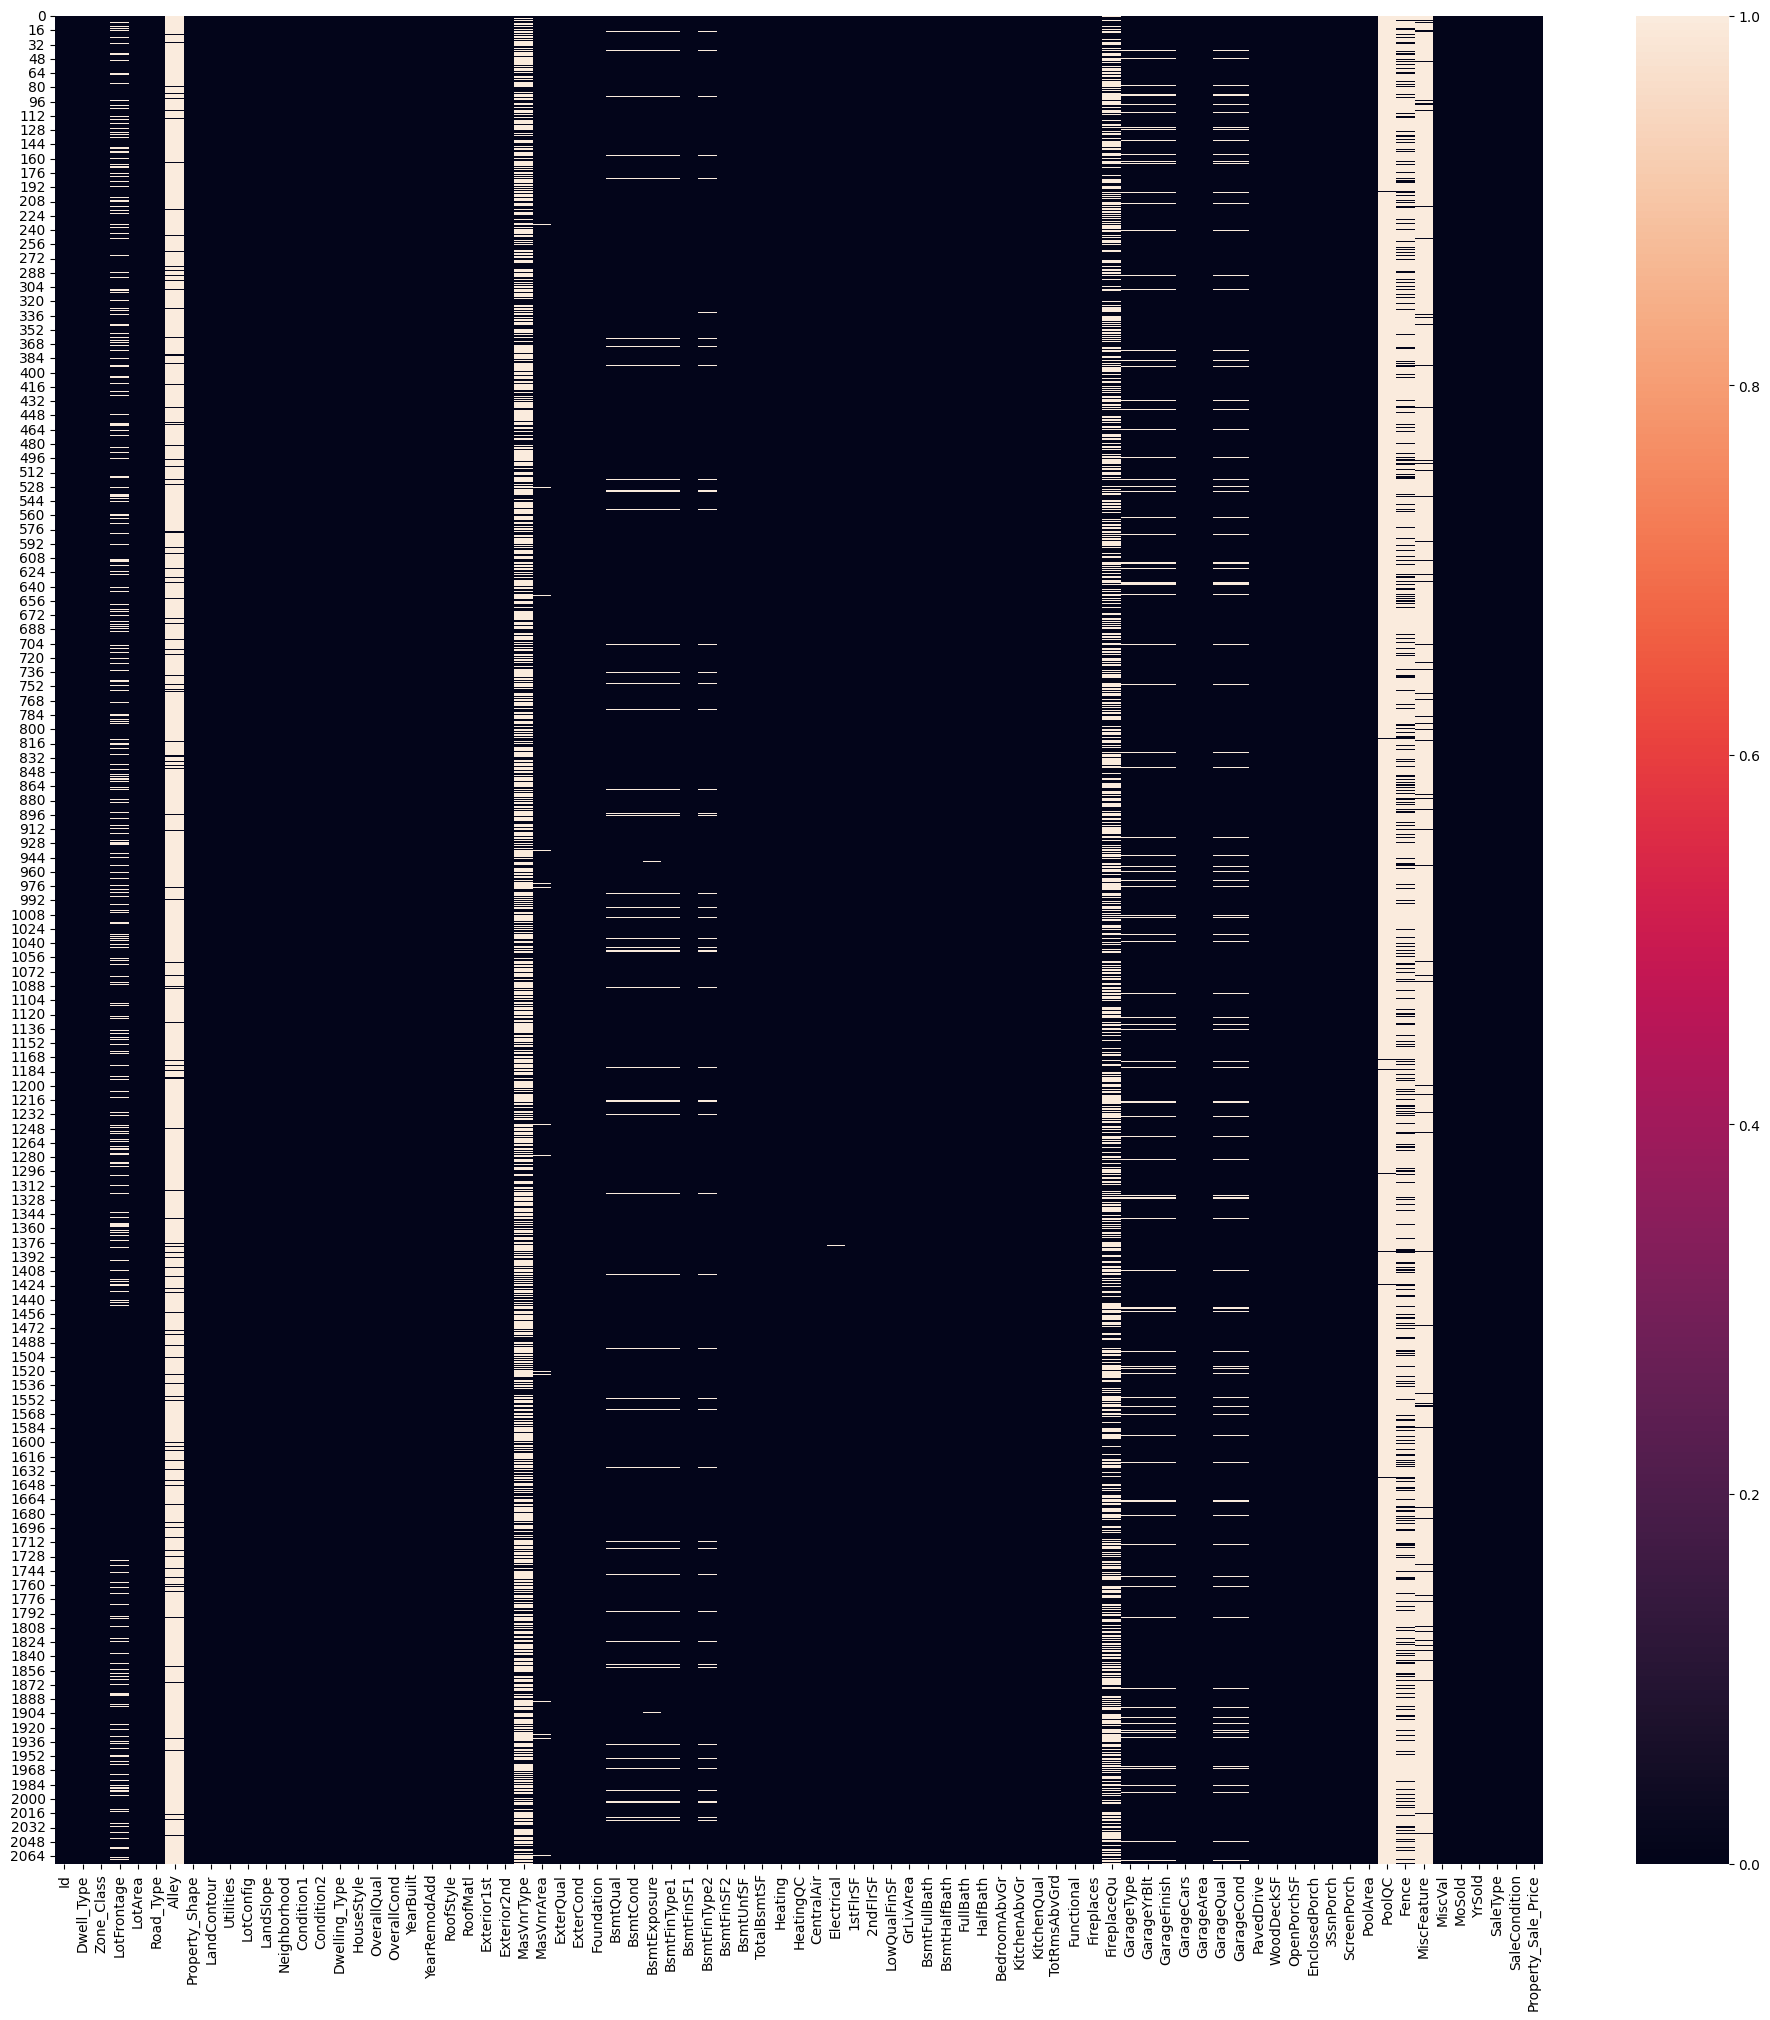

In [ ]:
plt.figure(figsize=(24,24))
sns.heatmap(df.isnull())

In [ ]:
missingprecentage=round((df.isnull().sum())/(df.shape[0])*100,1)
missingprecentage.sort_values(ascending=False).head(18)

PoolQC          99.6
MiscFeature     96.1
Alley           93.8
Fence           80.5
MasVnrType      60.2
FireplaceQu     47.7
LotFrontage     15.4
GarageQual       5.5
GarageFinish     5.5
GarageType       5.5
GarageYrBlt      5.5
GarageCond       5.5
BsmtFinType2     2.9
BsmtExposure     2.9
BsmtCond         2.8
BsmtQual         2.8
BsmtFinType1     2.8
MasVnrArea       0.7
dtype: float64

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(19)

PoolQC          2065
MiscFeature     1993
Alley           1944
Fence           1669
MasVnrType      1247
FireplaceQu      988
LotFrontage      320
GarageQual       113
GarageFinish     113
GarageType       113
GarageYrBlt      113
GarageCond       113
BsmtExposure      61
BsmtFinType2      60
BsmtCond          59
BsmtQual          59
BsmtFinType1      59
MasVnrArea        14
Electrical         1
dtype: int64

In [ ]:
# LotFrontage: fill NaN with the median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

# Alley: fill NaN with 'No Access'
df['Alley'] = df['Alley'].fillna('No Access')

# Basement-related columns: fill NaN with 'No Basement'
df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')
df['BsmtCond'] = df['BsmtCond'].fillna('No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')

# Garage-related columns
df['GarageType'] = df['GarageType'].fillna('No Garage')
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')
df['GarageQual'] = df['GarageQual'].fillna('No Garage')
df['GarageCond'] = df['GarageCond'].fillna('No Garage')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

# Other features
df['PoolQC'] = df['PoolQC'].fillna('No Pool')
df['Fence'] = df['Fence'].fillna('No Fence')
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')
df['MiscFeature'] = df['MiscFeature'].fillna('None')

df['MasVnrArea']=df['MasVnrArea'].fillna(0)
df['MasVnrType']=df['MasVnrType'].fillna('None')
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

<Axes: >

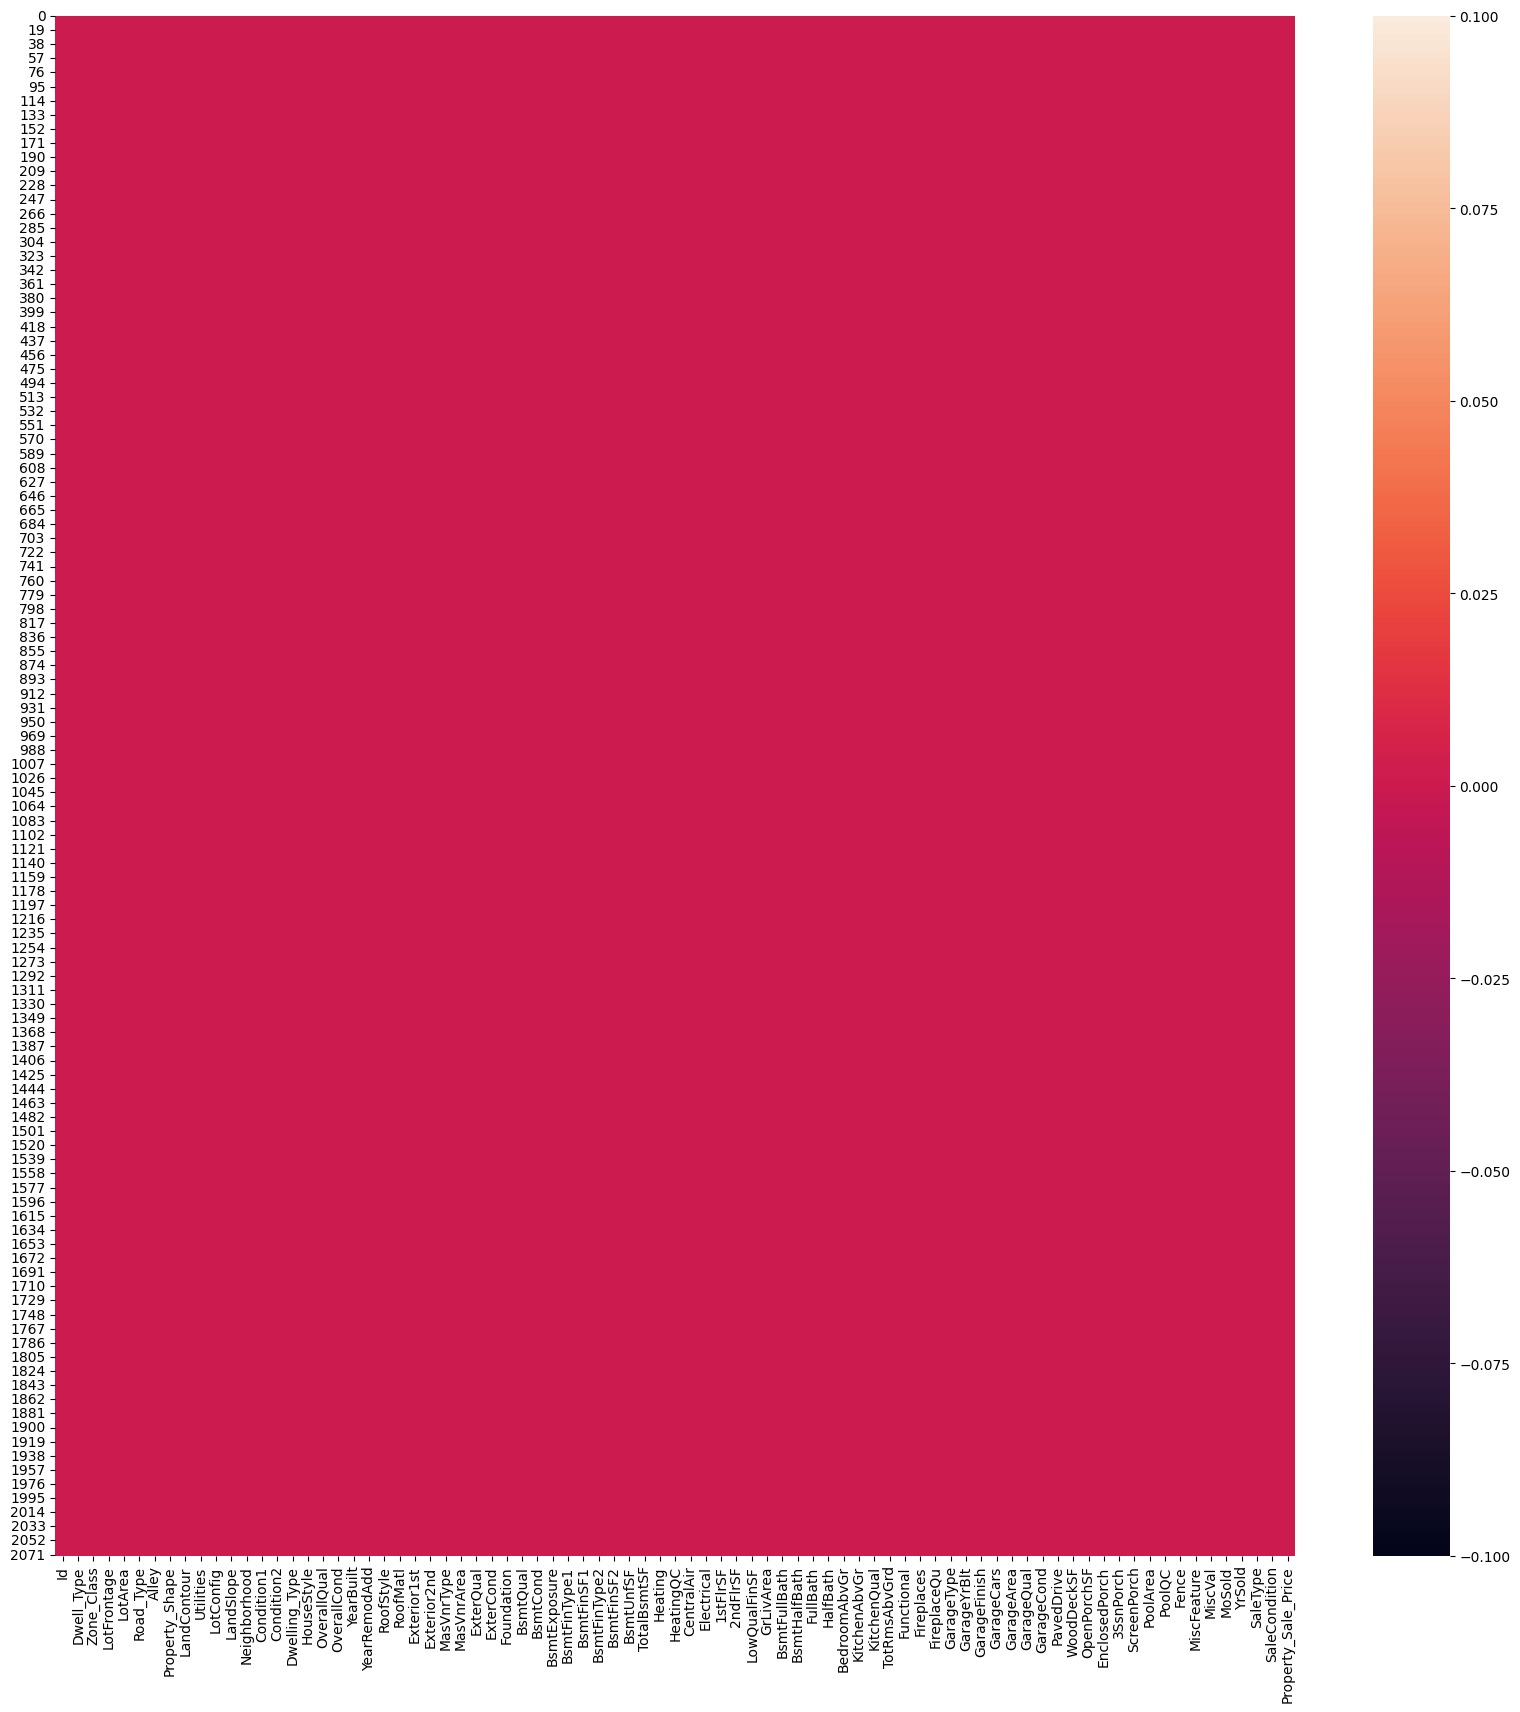

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull())

In [ ]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))

Categorical variables:
['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
No. of. categorical features:  43


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in object_cols:
    df[i]=label_encoder.fit_transform(df[i])

<Axes: >

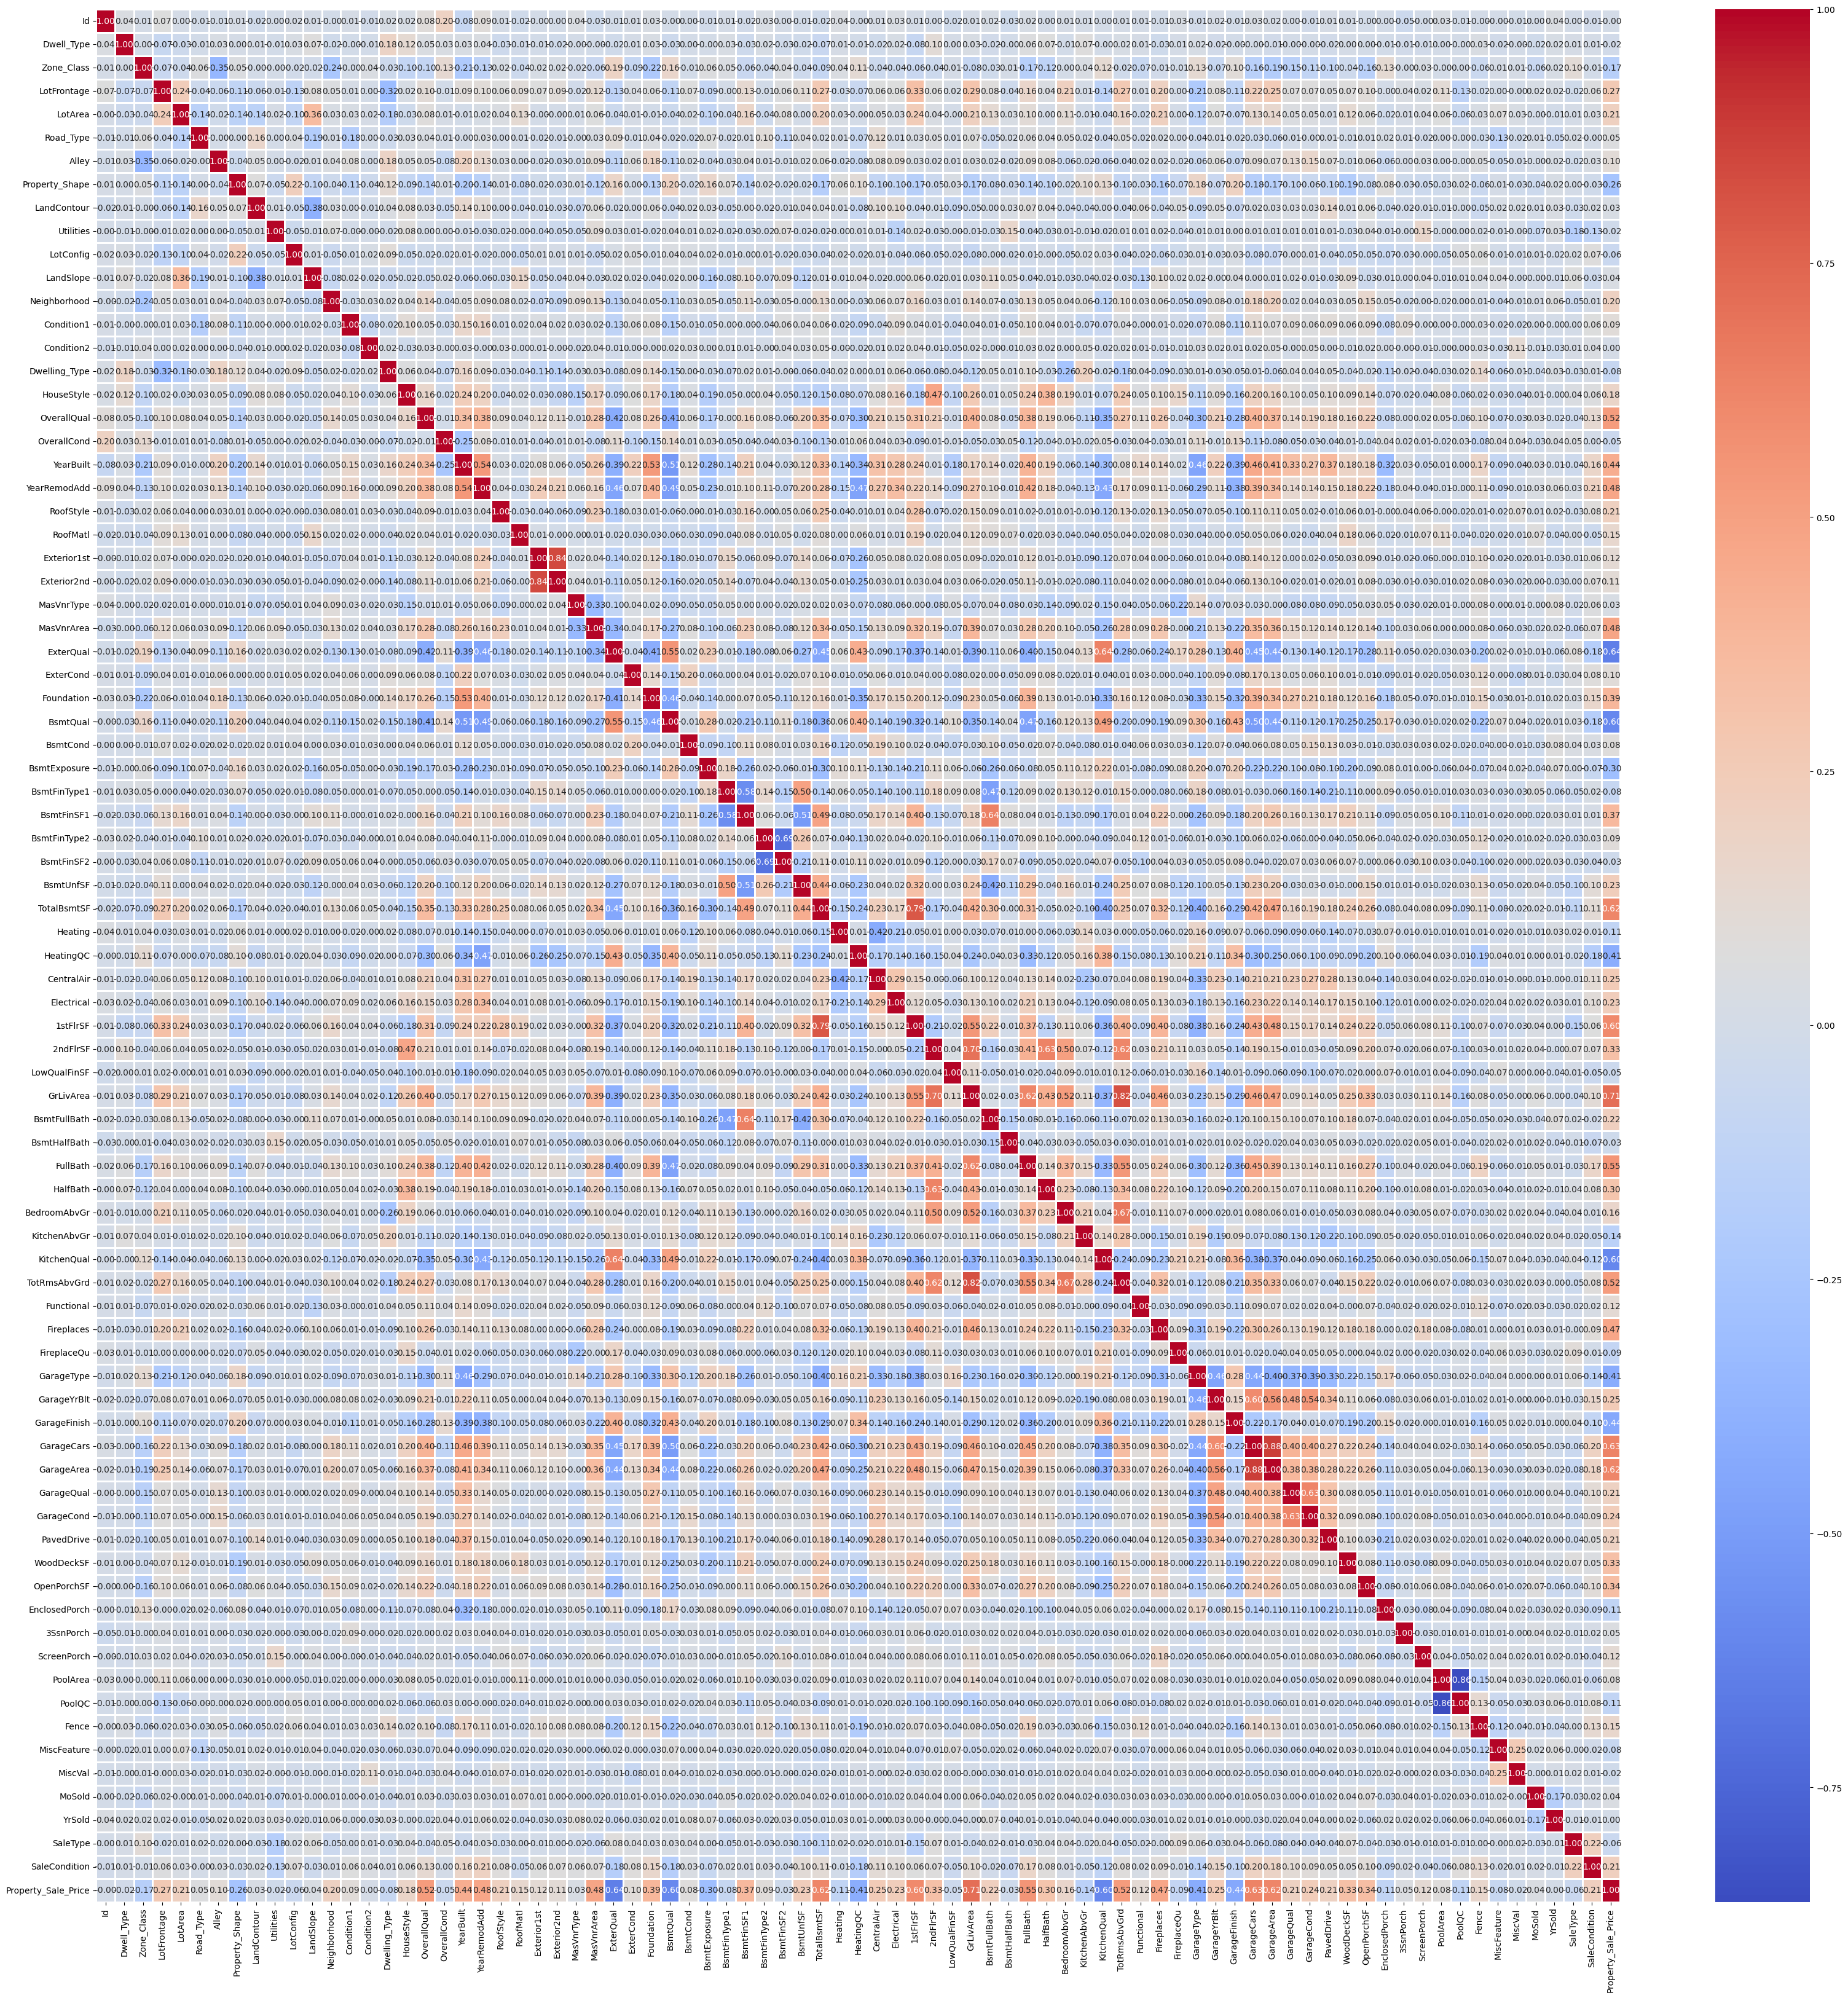

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(df.corr(),
			cmap = 'coolwarm',
			fmt = '.2f',
			linewidths = 2,
			annot = True)
sns.heatmap()

In [ ]:
# # Importing datetime package for date time operations
# import datetime as dt

# # using date time package to find the current year
# current_year = int(dt.datetime.now().year)

# # Subtracting the YearBuilt from current_year to find out the age of the building
# building_age = current_year - df['YearBuilt']

# # Subtracting the YearRemonAdd from current_year to find out the age since the
# # building was remodelled
# remodelled_age = current_year - df['YearRemodAdd']

# garage_age = current_year - df['GarageYrBlt']

# df['building_age'] = building_age
# df['remodelled_age'] = remodelled_age
# df['garage_age'] = garage_age

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['Property_Sale_Price'], axis=1)
Y = df['Property_Sale_Price']

# Split the training set into
# training and validation set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR =svm. SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_test)

print(mean_absolute_percentage_error(Y_test, Y_pred)*100)
# not very good accuracy is provided so used another model

34.18429778425947


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_test)
mean_absolute_percentage_error(Y_test, Y_pred)*100

9.234291135868776

In [ ]:
import joblib

joblib.dump(model_RFR, 'model_rfr.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']